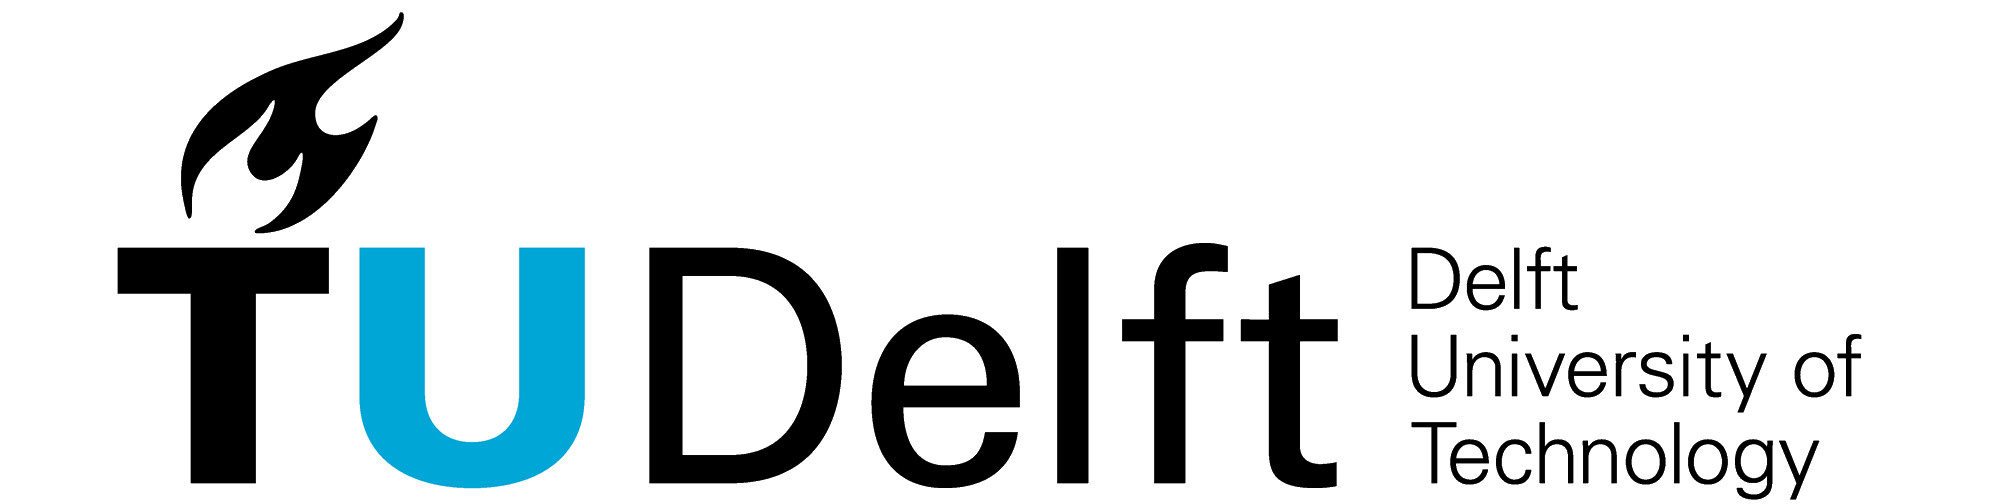

# Assignment 4 - ML Ethical and Societal perspective
Week 4 - CS4305TU Applied Machine Learning <br>

By <b> Nadia Metoui </b> and <b> Ibo van de Poel </b><br>
Faculty of Technology, Policy, and Management (TPM)

***Submission Instructions***
 - Answer the questions (code or text) in this Notebook 
 - Rename the Notebook by adding your group number
 - Send the your answers both in ipynb and HTML format

<H2>Part I: Socio-technical abstraction of an ML-based system</H2>
<i>LO-1: Identify and analyse ethical issues related to ML.<i><br>
<i>LO-2: Discuss machine learning fairness in the broader context of sociotechnical systems.</i>

Q1: Analyse and discuss the potential harmes of an ML-based Recommendation System using the Taxonomy and Model of Milan et <i>al.</i> (2020).
To help with your analysis we provide 3 case studies you can find in Brightspace
- Tiktok recommendation systems (See Case Study 1)
- Youtube recommendation systems (See Case Study 2)
- Tinder recommendation systems (See Case Study 3)

Choose <b>one of the  Case Studies</b> above and answer the following questions based on your knowledge of the platform and the information you read on the case study:
- a) Briefly summarise, what seems to be the ethical/social issue tackled in the use case you selected. 
- b) Who are the stakeholdes in this case? Name and describe at lease one stakeholdes from each category? 
- c) Briefly explain what are the intrests of each stakeholder and value they derive from using the recommendation system.
- d) Briefly explain what are the potential harmes for each stakeholde and how are they impacting them?

<div class="alert alert-block alert-info">
<b>Tip:</b> Consider all stakholders depicted in the figure below. Use the categorization of (Milano 2020).<br>
The full paper as well as a cheatsheet can be found in Brightspace.
</div>

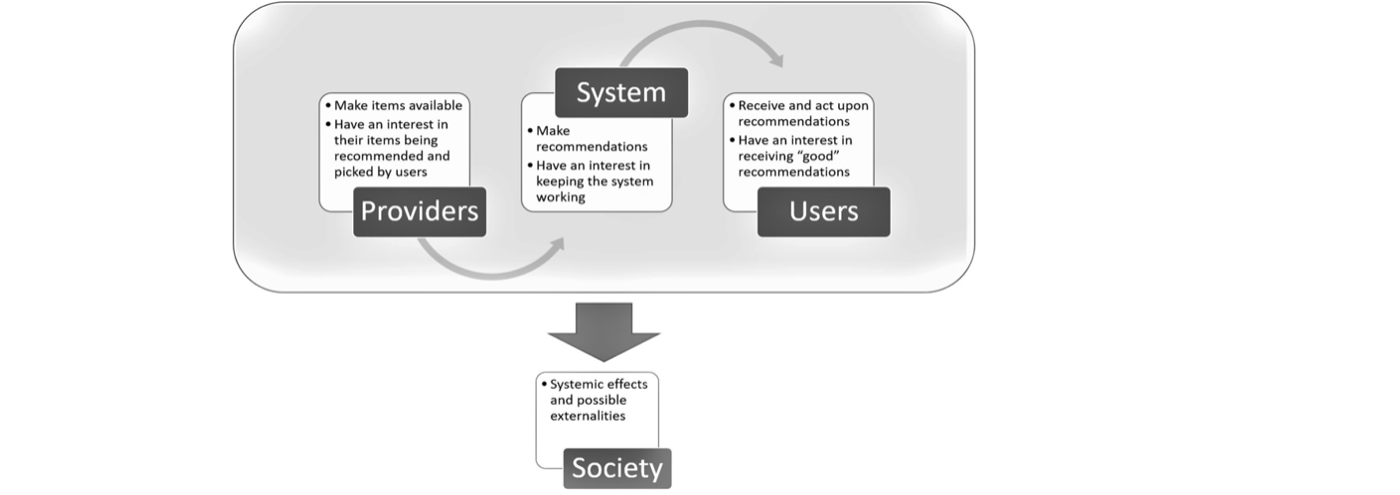

<div class="alert alert-block alert-info">
    
<b>Types of Harm</b>
- <u>on Utility</u>: Utility is the value each party is expecting to derive from using a the ML-based system. The impact or harm to Utility can be assessed using quantifiable metrics (e.g., time, money)
- <u>on Rights</u>: legal, social, or ethical entitlements (e.g., privacy autonomy, equality)  The impact or harm to Ritghts is very hard to quantify.

<br>

<b>Types of Impacts</b>
- <u>Immediate harm</u>: the recommendation or the ML-based system has an immediate and direct negative impact e.g., errors (incorrect outputs), out of context results (inappropriate outputs), opacity (uninterpretabel output).
- <u>Exposure to Risk</u>: the recommendation or the ML-based system exposes the Stakeholder(s) to latent or potential negative impacts. Even if these impacts do not materialize, exposure to such risks is considered unethical.
</div>

-  Write your answers here you are free to add other cells if needed

# c) Interests of each stakeholders and the value they derive from the recommendation syetem

1) Providers
- The providers use the recommendation system to keep the users stick to their platform. In case of youtube, the recommended videos keeps the user engaged with their platform for higher amount of time. This increases the ad revenue collected by the providers.

2) System
- The system makes the recommendations available to the user. With the help of advanced machine learning algorithm the recommendation are targeted to the user based on his/her watch history on youtube.

3) Users
- The users have interests in good recommendations provided by the platform.

4) Society
- 

<br><br>

<H2> Part II. Detecting and Mitigating bias*.</H2>
<i>LO-3: Apply state-of-the-art debiasing approaches to identify and mitigate risks of biases in your ML-based system.</i><br>
<i>LO-4. Compare different implementations of fairness metrics and unfairness mitigation approaches.  
</i>

*Acknowledgement: Part II of this assignment is largely based on the code developed by <i><b>Agathe Balayn</b></i> and <i><b>Seda Gürses</b></i>

In this part of the assignment, you will be exploring a use case where a Bank wants to develop an ML-based ADM (automate decision system) to decide whether to <b>grant</b> or <b>not to grant</b> a loan to a given applicant. To do so the Bank uses historical data containing multiple application records, characterized by information about the loan applicants (e.g., age, gender, personal situation) and information about the loan (e.g., amount, duration, purpose). Each application is labeled <i> good credit </i> if the loan had been reimbursed or <i>bad credit</i> if the loan has not been reimbursed or if there where several issues with the reimbursement.

To simulate this scenario we will build a classifier to disinguich between good and bad loans (or credits). We will train the classifier using the <i><b>German credit data</b></i> (you can information about the dataset and its attributes here: (https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc).<br>
And you can download the dataset here:
https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data<br>


You will be requested to take a closer look at the data and identify biases. We will use some tools form <i><b>AIF360 toolkit</b></i><br>(https://aif360.mybluemix.net/) a toolkit developed by IBM to detect and mitigate "bias" and "unfairness".

Steps of Part II
- Step 1: Set-up (Provided)
- Step 2: Explore and familiarize with the dataset
- Step 3: Pre-processing Biases: Protected attributes, proxies, data representation and skews  
- Step 4: In-processing Biases: Identify and Mitigate

<H3>Step 2: Set-up</H3>

You first need to install the required libraries for this part.  The main libraries are the `aif360`,  `lime`, and`sklearn` ones. We also recommend using `numpy` and `pandas` to easily manipulate and explore the data.

<div class="alert alert-block alert-danger">
<b>Note:</b> Uncomment and run the next cell if you have not previously installed the libraries.
</div>


<b>Installing required libraries</b>

In [ ]:
# !pip install aif360
# !pip install fairlearn
# !pip install tensorflow
# !pip install lime

<b>Loading required libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Markdown, display


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(0)

from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.algorithms.inprocessing import MetaFairClassifier

from aif360.datasets.lime_encoder import LimeEncoder

import lime
import lime.lime_tabular

<b>Loading the dataset</b>

Here, we will load the <i><b>German credit data</b></i> in a format that is compatible with the use of the <i><b>AIF360 toolkit</b></i>. For this, you need to make use of the already implemented class of the toolkit `GermanDataset()`.

Because the data available is encoded in a complex way, we provide you with the code to preprocess it, in the function `custom_preprocessing()`. We also provide you with an example on how to actually load the data using the `GermanDataset()` class, in `preproc_and_load_data_german()`. 

In [2]:
def preproc_and_load_data_german():
    """
    Load and pre-process german credit dataset.
    Args: -
    Returns:
        GermanDataset: An instance of GermanDataset with required pre-processing.
    """
    def custom_preprocessing(df):
        """ Custom pre-processing for German Credit Data
        """

        def group_credit_hist(x):
            if x in ['A30', 'A31', 'A32']:
                return 'None/Paid'
            elif x == 'A33':
                return 'Delay'
            elif x == 'A34':
                return 'Other'
            else:
                return 'NA'

        def group_employ(x):
            if x == 'A71':
                return 'Unemployed'
            elif x in ['A72', 'A73']:
                return '1-4 years'
            elif x in ['A74', 'A75']:
                return '4+ years'
            else:
                return 'NA'

        def group_savings(x):
            if x in ['A61', 'A62']:
                return '<500'
            elif x in ['A63', 'A64']:
                return '500+'
            elif x == 'A65':
                return 'Unknown/None'
            else:
                return 'NA'

        def group_status(x):
            if x in ['A11', 'A12']:
                return '<200'
            elif x in ['A13']:
                return '200+'
            elif x == 'A14':
                return 'None'
            else:
                return 'NA'
        
        def group_personal_status(x):
            if x in ['A91']:
                return 'divorced/separated'
            elif x in ['A92']:
                return 'divorced/separated/married'
            elif x in ['A93', 'A95']:
                return 'single'
            elif x in ['A94']:
                return 'married/widowed'
            else:
                return 'NA'
        #print(df)
        #print(df.shape)
        #print(df.isnull().sum().sum())
        #print(df.isin(['NA']).sum(axis=0))
        status_map = {'A91': 1.0, 'A93': 1.0, 'A94': 1.0,
                    'A92': 0.0, 'A95': 0.0}
        
        df['sex'] = df['personal_status'].replace(status_map)
        

        # group credit history, savings, and employment
        df['credit_history'] = df['credit_history'].apply(lambda x: group_credit_hist(x))
        df['savings'] = df['savings'].apply(lambda x: group_savings(x))
        df['employment'] = df['employment'].apply(lambda x: group_employ(x))
        #df['age'] = df['age'].apply(lambda x: np.float(x >= 26))
        df['status'] = df['status'].apply(lambda x: group_status(x))
        df['personal_status'] = df['personal_status'].apply(lambda x: group_personal_status(x))
        #print(df.isin(['NA']).sum(axis=0))
        
        print(df)
        df.to_csv("german_credit_data_processed_v2.csv")
        return df

    # Feature partitions
    XD_features = ['number_of_credits', 'telephone',
                     'foreign_worker', 'people_liable_for', 'skill_level', 'credit_history', 'installment_plans', 'residence_since', 'property', 'other_debtors', 'purpose', 'savings', 'employment', 'sex', 'age', 'personal_status', 'month']
    D_features = ['sex', 'age'] 
    Y_features = ['credit']
    X_features = list(set(XD_features)-set(D_features))
    categorical_features = ['installment_plans', 'telephone',
                     'foreign_worker', 'skill_level', 'credit_history', 'property', 
                            'other_debtors', 'purpose', 'savings', 'employment', 'personal_status']

    # privileged classes
    all_privileged_classes = {"sex": [1.0],
                              "age": lambda x: x > 25}

    # protected attribute maps
    all_protected_attribute_maps = {"sex": {1.0: 'Male', 0.0: 'Female'},
                                    "age": {1.0: 'Old', 0.0: 'Young'}}

    return GermanDataset(
        label_name=Y_features[0],
        favorable_classes=[1],
        protected_attribute_names=D_features,
        privileged_classes=[all_privileged_classes[x] for x in D_features],
        instance_weights_name=None,
        categorical_features=categorical_features,
        features_to_keep=X_features+Y_features+D_features,
        features_to_drop=[],
        metadata={ 'label_maps': [{1.0: 'Good Credit', 2.0: 'Bad Credit'}],
                   'protected_attribute_maps': [all_protected_attribute_maps[x]
                                for x in D_features]},
        custom_preprocessing=custom_preprocessing)

<br><br>

<H3>Step 2: Explore and familiarize with the dataset</H3>

<b>Q1: Analyse the dataset and answer the following:</b> 
- What is the number of records, 
- What is the number of attributes present with the preprocessing we provided, and 
- What is the list of attribute names.
- Are there missing values that could create biases

<div class="alert alert-block alert-danger">
<b>Note:</b> If you encounted any errors in the following cell add the files "german.doc" and "german.data" to the folder <br>
"dist-packages/aif360/data/raw/german/" under your python path you should get the same instructions in the error message.

You can find the files in Brightspace or download them from: <br>
https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data<br>
https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc
    </div>

In [3]:
# Instanciating the German credit dataset
dataset_gcredit = preproc_and_load_data_german()

    status  month credit_history purpose  credit_amount       savings  \
0     <200      6          Other     A43           1169  Unknown/None   
1     <200     48      None/Paid     A43           5951          <500   
2     None     12          Other     A46           2096          <500   
3     <200     42      None/Paid     A42           7882          <500   
4     <200     24          Delay     A40           4870          <500   
..     ...    ...            ...     ...            ...           ...   
995   None     12      None/Paid     A42           1736          <500   
996   <200     30      None/Paid     A41           3857          <500   
997   None     12      None/Paid     A43            804          <500   
998   <200     45      None/Paid     A43           1845          <500   
999   <200     45          Other     A41           4576          <500   

     employment  investment_as_income_percentage             personal_status  \
0      4+ years                            

In [5]:
dataset_gcredit

               instance weights features                                      \
                                                         protected attribute   
                                   month residence_since                 age   
instance names                                                                 
0                           1.0      6.0             4.0                 1.0   
1                           1.0     48.0             2.0                 0.0   
2                           1.0     12.0             3.0                 1.0   
3                           1.0     42.0             4.0                 1.0   
4                           1.0     24.0             4.0                 1.0   
...                         ...      ...             ...                 ...   
995                         1.0     12.0             4.0                 1.0   
996                         1.0     30.0             4.0                 1.0   
997                         1.0     12.0

<div class="alert alert-block alert-info">
<b>Tip:</b> The documentation of "AIF360 - German credit data" dataset  can be found <a href="https://aif360.readthedocs.io/en/latest/modules/generated/aif360.datasets.GermanDataset.html">[HERE]</a>. 


Take a look at documentation of AIF360 and use existing methods to explore the dataset instance how to access the features with:<br> `dataset_gcredit.features`. 

You are also free to transform the dataset into a pandas dataframe to extract the needed information.
Use <br>
    `pd_gdata = pd.DataFrame(dataset_gcredit.features, columns=dataset_gcredit.feature_names)` <br>
    to create the pandas dataframe
</div> 

- 

In [7]:
### Answer by writing the code in this cell (or create more cells if needed):###
# Number of records:
pd_gdata = pd.DataFrame(dataset_gcredit.features, columns=dataset_gcredit.feature_names)
print('Number of records: \n', pd_gdata.shape[0], '\n')


# Number of features:
#print(pd_gdata.columns)
print('Number of featurest using shape function: \n', pd_gdata.shape[1], '\n')
# or
print('Number of featurest using columns function: \n', np.size(pd_gdata.columns), '\n')


# Feature names:
#print('Feature names: ', pd_gdata.columns)
print('Feature names: \n', "//* *//".join(pd_gdata.columns), '\n')


#Number of missing values for each attribute
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      pd_gdata.isnull().sum())


Number of records: 
 1000 

Number of featurest using shape function: 
 47 

Number of featurest using columns function: 
 47 

Feature names: 
 month//* *//residence_since//* *//age//* *//number_of_credits//* *//people_liable_for//* *//sex//* *//credit_history=Delay//* *//credit_history=None/Paid//* *//credit_history=Other//* *//purpose=A40//* *//purpose=A41//* *//purpose=A410//* *//purpose=A42//* *//purpose=A43//* *//purpose=A44//* *//purpose=A45//* *//purpose=A46//* *//purpose=A48//* *//purpose=A49//* *//savings=500+//* *//savings=<500//* *//savings=Unknown/None//* *//employment=1-4 years//* *//employment=4+ years//* *//employment=Unemployed//* *//personal_status=divorced/separated//* *//personal_status=divorced/separated/married//* *//personal_status=married/widowed//* *//personal_status=single//* *//other_debtors=A101//* *//other_debtors=A102//* *//other_debtors=A103//* *//property=A121//* *//property=A122//* *//property=A123//* *//property=A124//* *//installment_plans=A141//* *//

<br><br>

<H3>Step 3: Identify protected attributes and proxies</H3>

<b>Q2: Identification of protected attributes</b>

a) Study the dataset and its documentation and identify which attributes that might raise unfairness concerns and should be considered protected (according to the law). Explain, in your opinion, why are these attributes protected provide exaples of bias or unfaireness for each identified attribute. 

<div class="alert alert-block alert-info">
<b>Tip:</b> 
Take a look at the following documents<br>
<a href="https://rm.coe.int/discrimination-artificial-intelligence-and-algorithmic-decision-making/1680925d73">(1) Discrimination, Artificial Intelligence, and Algorithmic Decision-Making (2018)</a><br>
<a href="http://ec.europa.eu/social/BlobServlet?docId=1691&langId=en&usg=AOvVaw3vI30bO3jisairH2Z7-nSl">(2) Age discrimination and European Law (2005)</a>. 
<div> 



-

b) Study the dataset and its documentation and identify any further "non-protect" attributes that could cause  unfairenesses. Explain your reasoning. provide examples of bias or unfairenesse related to each attribut.

-

<br><br>

<b>Q3:  Identification of "spurious" proxies</b>

a) Find the proxies for the attribute "sex".

b) Find proxies for one additional protected attribut you identified in Q2-a.

c) In your opinion, why do we want to identify proxies for protected attributes in a dataset? How should you handle the proxies?

<div class="alert alert-block alert-info">
<b> Tip: </b>A proxy attribute <i>Ap</i>  is an attribute that has a similar distribution as another attribute <i>Ax</i>, so having access to the proxy attribute <i>Ap</i> provides a good knowledge of the other attribute <i>Ax</i>. For instance, in the US the zipcode is a powerful proxy for race and education, the zipcode combined with websites visited is an even more powerful proxy, names in certain languages are strong proxies for gender, etc.<br>

The simplest way to identify proxy attributes for a protected attribute <i>Ax</i> is to compute the correlation of <i>Ax</i>  with each other attributes in the dataset. The higher the corrolation the higher the likelihood an attribute is a proxy of <i>Ax</i> <br>

You can use the `corr()` function of the pandas library to compute the correlation between two attributes
</div> 


   

<br>
<b>Q4: Data skews and Representation biases</b>

a) Is the dataset we are working with representative of the German population with regard to age. <br>
Add any needed code or analysis to briefely justify your answer<br>

b) Is the dataset we are working with representative of the German population with regard to gender. <br>
Add any needed code or analysis to briefely justify your answer

<div class="alert alert-block alert-info">
<b> Tip: </b> You can find demographic information from Wikipedia <a href=https://en.wikipedia.org/wiki/Demographics_of_Germany>[Here]</a>
    
Go to section <b><i>Demographic statistics</i></b> take a closer look at the most racent  <b><i>Age structure</i></b> data (it should be from 2018). Use this data to build a distribution of german population across age, then across gender and compare it to the distributions from <b><i>the German credit data</i></b> we are working with.

It is up to you how you want to justify your answer, however using visualizations will provide more points (i.e., plots and diagram)
</div>
    

In [ ]:
# Answer with the code here 
# No code is required however it will make your reasening clearer to the assessor 



-

<b>Q5: Data skews</b> 

Is there a skew towards certain groups:<br>
a) Analyse the dataset, and report the numbers of male / female with bad/good credit. Do the same for "old" / " young" people in the datset. Normalize these numbers respectively over the total number of males/females, "old"/"young" for a fair comparison. For that, you can consider having 50 individuals for each of these groups.

b) Brieflt describe your findings and explain the impacts (on faireness) of using this dataset as training data (if any)

<div class="alert alert-block alert-info">
<b> Tip: </b> We provide a function for Normalised count per attribut and lable you are free to use it or implement your own method 
    
`getNormalizedCount()`
</div>
    

In [8]:
# Normalised count per attribut and lable 
def getNormalizedCount(pd_train_data, protected_attribute, label):
    unnormalized_count = pd_train_data[[protected_attribute, label]].value_counts()
    counts = {}
    for attribute_value in pd_train_data[[protected_attribute]].value_counts().keys():
        counts[attribute_value[0]] = pd_train_data[[protected_attribute]].value_counts()[attribute_value]
    normalized_count = unnormalized_count[:]
    for attribute_value, credit_value in pd_train_data[[protected_attribute, label]].value_counts().keys():
        normalized_count[attribute_value, credit_value] = normalized_count[attribute_value, credit_value] * (50 / counts[attribute_value])
    return normalized_count

# add the credit labels to the data set.
pd_gdata["credit"] = dataset_gcredit.labels

Number of people in young age group having good credit score:  28
Number of people in young age group having bad credit score:  21
Number of people in old age group having good credit score:  36
Number of people in old age group having bad credit score:  13
Number of females having good credit score:  32
Number of females having bad credit score:  17
Number of males having good credit score:  36
Number of males having bad credit score:  13


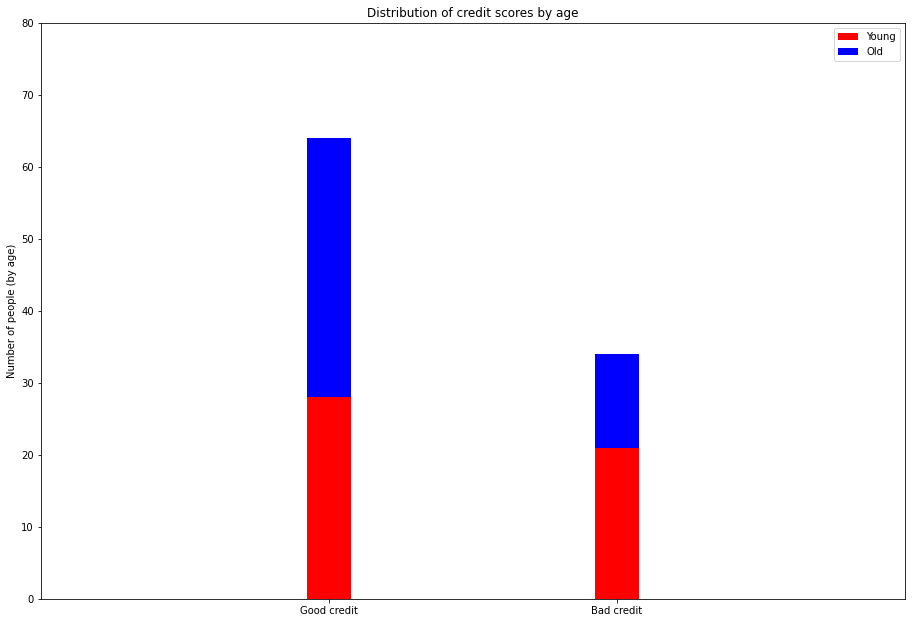

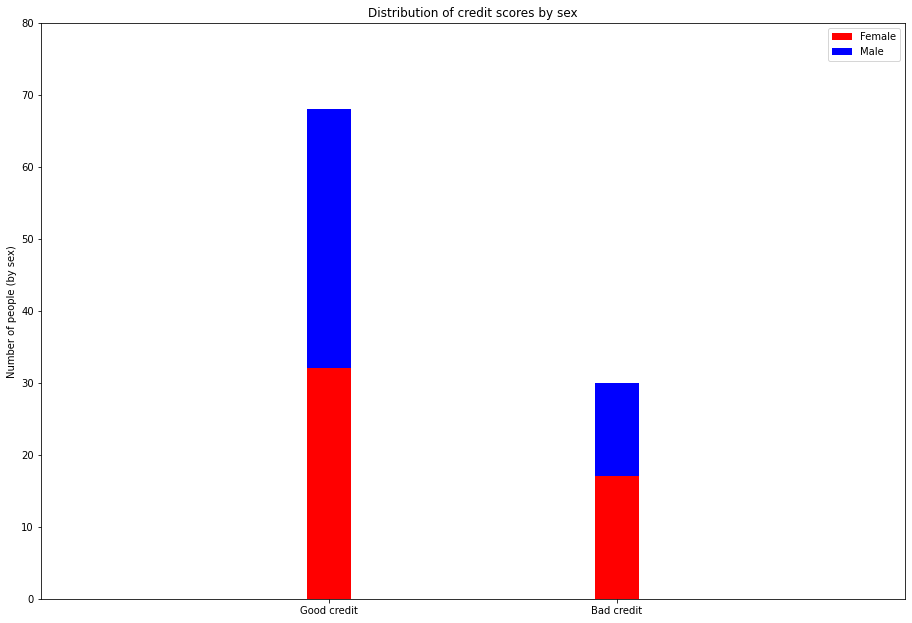

In [9]:
### YOUR ANSWER HERE ###
# ADD code here to print the AGE-CREDIT distribution
Age_count = getNormalizedCount(pd_gdata, 'age', 'credit')
Young = Age_count[0]
Old = Age_count[1]

print('Number of people in young age group having good credit score: ', Young[1])
print('Number of people in young age group having bad credit score: ', Young[2])
print('Number of people in old age group having good credit score: ', Old[1])
print('Number of people in old age group having bad credit score: ', Old[2])

# ADD code here to print the SEX-CREDIT distribution
Sex_count = getNormalizedCount(pd_gdata, 'sex', 'credit')

Female = Sex_count[0]
Male = Sex_count[1]

print('Number of females having good credit score: ', Female[1])
print('Number of females having bad credit score: ', Female[2])
print('Number of males having good credit score: ', Male[1])
print('Number of males having bad credit score: ', Male[2])

#pd_gdata[['age', ]].value_counts()
#pd_gdata[['age', 'credit']]
# ADD code here to visualise the results for both you can use stacked bar plots from pandas toolkit
#<your dataframe>.size().unstack().plot(kind='bar', stacked=True)

width = 0.15
ind = ['Good credit', 'Bad credit']
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(ind, Young, width, color='r')
ax.bar(ind, Old, width,bottom=Young, color='b')
ax.set_ylabel('Number of people (by age)')
ax.set_title('Distribution of credit scores by age')
ax.set_yticks(np.arange(0, 81, 10))
ax.set_xlim(-1,2)
ax.legend(labels=['Young', 'Old'])
plt.show()


width = 0.15
ind = ['Good credit', 'Bad credit']
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(ind, Female, width, color='r')
ax.bar(ind, Male, width,bottom=Female, color='b')
ax.set_ylabel('Number of people (by sex)')
ax.set_title('Distribution of credit scores by sex')
ax.set_yticks(np.arange(0, 81, 10))
ax.set_xlim(-1,2)
ax.legend(labels=['Female', 'Male'])
plt.show()

In [92]:
np.array([1,2]) + 1

array([2, 3])

-

<br><br>

<H3> Step 4: In-Prosessing Biases </H3>

<b>Q6: We will apply in-processing mitigation technique to alliviate the <i>age</i> biase in the German credit data</b>

a) Set the privilege and unprivilaged age group based on the findings of question Q5-a (answer in the text then add the variables 0 or 1 to the code below). Provide a very brief justification for your answer


- The young group is unprivilaged because the bad credit to good credit score ratio is higher for them when compared to the old age group. 

In [25]:
# Add the code for question a) here
# code = 1: is old above 25
# code = 0: is young under 25

privileged_code = 1 #add the write code here
unprivileged_code = 0 #add the write code here

In [26]:
# We start by defining the privilaged and unprivileged 
privileged_groups = [{'age': privileged_code}] 
unprivileged_groups = [{'age': unprivileged_code}] 

<b>Preparation for training a classifier.</b><br>
We will  divide the dataset into a training and a test subsets.
We define them respectively as 70% and 30% of the whole data.
We will use the following code to do so.

In [27]:
dataset_gcredit_train, dataset_gcredit_test = \
    dataset_gcredit.split([0.7], shuffle=True, seed=1)

<b>Faireness before mitigation</b><br>
Below we are using several faireness metrics from AIF360 toolkint to evaluate fairenesse metrics before appling the inprocessing mitigation

In [28]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_gcredit_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Train set: Difference in mean outcomes between unprivileged and privileged groups = {:.3f}".format(metric_orig_train.mean_difference()))

Train set: Difference in mean outcomes between unprivileged and privileged groups = -0.119


Get classifier without fairness constraints

In [14]:
biased_model = MetaFairClassifier(tau=0, sensitive_attr="sex", type="fdr").fit(dataset_gcredit_train)

Apply the unconstrained model to test data

In [15]:
dataset_bias_test = biased_model.predict(dataset_gcredit_test)

Build and test the "biased" classifier

In [16]:
classified_metric_bias_test = ClassificationMetric(dataset_gcredit_test, dataset_bias_test,
                                                   unprivileged_groups=unprivileged_groups,
                                                   privileged_groups=privileged_groups)
print("Test set: Classification accuracy = {:.3f}".format(classified_metric_bias_test.accuracy()))
TPR = classified_metric_bias_test.true_positive_rate()
TNR = classified_metric_bias_test.true_negative_rate()
bal_acc_bias_test = 0.5*(TPR+TNR)
print("Test set: Balanced classification accuracy = {:.3f}".format(bal_acc_bias_test))
print("Test set: Disparate impact = {:.3f}".format(classified_metric_bias_test.disparate_impact()))
fdr = classified_metric_bias_test.false_discovery_rate_ratio()
fdr = min(fdr, 1/fdr)
print("Test set: False discovery rate ratio = {:.3f}".format(fdr))

Test set: Classification accuracy = 0.637
Test set: Balanced classification accuracy = 0.446
Test set: Disparate impact = 0.672
Test set: False discovery rate ratio = 0.649


<br>
<b> Q6 -</b>
b) Run the code above and explain the results: briefly describe each metric and the interpretation of the values.

Metrics:<br>
#### Difference in mean outcomes between unprivileged and privileged groups
- The privileged group was getting 11.9% more positive outcome than the unprevileged group.

#### Classification accuracy
- 63.3% of the total test data has been classified accurately.

#### Balanced classification accuracy
- It is the average of the true positive rate of the classification and the true negative rate of the classification. Since the false discovery rate is high (64.5%), the true positive rate is 35.5% and the true negative rate is 53.7%

#### Disparate impact
- The unintentional discrimination is 67.2%

#### False discovery rate ratio
- 64.5% of the total positive results were false positive results.




<div class="alert alert-block alert-info">
<b> Tip: </b> Make use of the documentation of <a href=https://aif360.readthedocs.io/en/latest/index.html><b>AIF360</b></a>, and your own search to understaind the metrics and to be able to interpret them.
</div>

-

<b> Train a debiased classifier </b><br>
In the following we will apply an in-processing debiasin technique <b><i>"Meta-Algorithm for fair classification"</i></b>. This debiesing technique operates with a faireness constraint i.e., by optimising for faireness metrics. You can read more about it <a href=https://arxiv.org/pdf/1806.06055.pdf>[HERE]</a><br>
For this example we will to optimize for the <i><b> the fals discovery rate (fdr)</b></i> and sensitive attribute <i><b> age </b></i>
    
Apply the debiased model to training data and train the <b><i>"debiased"</i></b> classifier

In [30]:
debiased_model = MetaFairClassifier(tau=0.7, sensitive_attr="age", type="fdr").fit(dataset_gcredit_train)

Apply the debiased classifier to test data

In [31]:
dataset_debiasing_test = debiased_model.predict(dataset_gcredit_test)

Compute the same faireness metrics for the <b><i>"debiased"</i></b> data and classifier

In [32]:
metric_dataset_debiasing_test = BinaryLabelDatasetMetric(dataset_debiasing_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Test set: Difference in mean outcomes between unprivileged and privileged groups = {:.3f}".format(metric_dataset_debiasing_test.mean_difference()))

Test set: Difference in mean outcomes between unprivileged and privileged groups = -0.234


In [33]:
classified_metric_debiasing_test = ClassificationMetric(dataset_gcredit_test, 
                                                 dataset_debiasing_test,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
print("Test set: Classification accuracy = {:.3f}".format(classified_metric_debiasing_test.accuracy()))
TPR = classified_metric_debiasing_test.true_positive_rate()
TNR = classified_metric_debiasing_test.true_negative_rate()
bal_acc_debiasing_test = 0.5*(TPR+TNR)
print("Test set: Balanced classification accuracy = {:.3f}".format(bal_acc_debiasing_test))
print("Test set: Disparate impact = {:.3f}".format(classified_metric_debiasing_test.disparate_impact()))
fdr = classified_metric_debiasing_test.false_discovery_rate_ratio()
fdr = min(fdr, 1/fdr)
print("Test set: False discovery rate ratio = {:.3f}".format(fdr))


Test set: Classification accuracy = 0.603
Test set: Balanced classification accuracy = 0.423
Test set: Disparate impact = 0.700
Test set: False discovery rate ratio = 0.620


<br>
<b> Q6 -</b>
c) Run the code above and compare the results between the <b><i>"debiased"</i></b> and the <b><i>"biased"</i></b> classifiers


<div class="alert alert-block alert-info">
<b> Tip: </b> Focus on <b>FDR</b>, <b>Accuracy</b> and <b>Difference in mean outcomes</b>
</div>

- The privileged groupes are getting 23.4% of more positive outcomes than the unprivileged groups (which was 11.9%). The debiassed classifer is showing higher amount of discrimination with the unprevileged catagory.

#### Classification accuracy
- 60.3% of the total test data has been classified accurately. Which is lesser than the biased classifiers.

#### Balanced classification accuracy
- Since the false discovery rate is high (62%), the true positive rate is 38%. Based on the balanced classification accuracy of 42.3%, the true negative rate is 46.6%. The TPR for unbiased classifiers is higher than the biased classifiers. And the TNR obtained using the unbiases classifier is lower than the one obtained using the biased classifier.

#### Disparate impact
- The unintentional discrimination is 70% (higher than the biased classifier, which is surprising)

#### False discovery rate ratio
- 62% of the total positive results were false positive results (lesser than the biased classifier, which means the optimization is working)

<br><br>

<H2> Part III. Explainability</H2>
<i>LO-4. Compare different implementations of fairness metrics and unfairness mitigation approaches.  
</i>

In this last part we will use the same scenario from Part II. To explore LIME Local Interpretable Model-Agnostic Explanations. 

In [ ]:
#Train model on german credit data dataset

dataset = dataset_gcredit_train  # data to train on

scale = StandardScaler().fit(dataset.features)   # remember the scale

model = LogisticRegression()        # model to learn

X_train = scale.transform(dataset.features)      #apply the scale
y_train = dataset.labels.ravel()


model.fit(X_train, y_train, sample_weight=dataset.instance_weights)

#save model
lr_orig = model
lr_scale_orig = scale

In [ ]:
#Test model on given dataset and find threshold for best balanced accuracy
import numpy as np
from tqdm import tqdm
thresh_arr = np.linspace(0.01, 0.5, 50)

scale = lr_scale_orig

model = lr_orig                  #model to test
dataset = dataset_gcredit_test        #data to test on

X_test = scale.transform(dataset.features)   #apply the same scale as applied to the training data
y_test = dataset.labels.ravel()
y_test_pred_prob = model.predict_proba(X_test)


bal_acc_arr = []
disp_imp_arr = []
avg_odds_diff_arr = []
    
for thresh in tqdm(thresh_arr):
    y_test_pred = (y_test_pred_prob[:,1] > thresh).astype(np.double)

    dataset_pred = dataset.copy()
    dataset_pred.labels = y_test_pred

    classified_metric = ClassificationMetric(dataset, 
                                                 dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    
    TPR = classified_metric.true_positive_rate()
    TNR = classified_metric.true_negative_rate()
    bal_acc = 0.5*(TPR+TNR)
    
    acc = accuracy_score(y_true=dataset.labels,
                            y_pred=dataset_pred.labels)
    bal_acc_arr.append(bal_acc)
    avg_odds_diff_arr.append(classified_metric.average_odds_difference())
    disp_imp_arr.append(metric_pred.disparate_impact())
    
thresh_arr_best_ind = np.where(bal_acc_arr == np.max(bal_acc_arr))[0][0]
thresh_arr_best = np.array(thresh_arr)[thresh_arr_best_ind]

best_bal_acc = bal_acc_arr[thresh_arr_best_ind]
disp_imp_at_best_bal_acc = np.abs(1.0-np.array(disp_imp_arr))[thresh_arr_best_ind]

avg_odds_diff_at_best_bal_acc = avg_odds_diff_arr[thresh_arr_best_ind]

In [ ]:
limeData = LimeEncoder().fit(dataset_gcredit_train)
s_train = limeData.transform(dataset_gcredit_train.features)
s_test = limeData.transform(dataset_gcredit_test.features)

scale = lr_scale_orig

model = lr_orig                  #model to test




explainer = lime.lime_tabular.LimeTabularExplainer(s_train ,class_names=limeData.s_class_names, 
                                                   feature_names = limeData.s_feature_names,
                                                   categorical_features=limeData.s_categorical_features, 
                                                   categorical_names=limeData.s_categorical_names, 
                                                   kernel_width=3, verbose=False,discretize_continuous=True)

s_predict_fn = lambda x: model.predict_proba(scale.transform(limeData.inverse_transform(x)))

<br>
<b>Q7: Using LIME </b> <br>
a) Provide a short definition of LIME and what it is used for. 

<div class="alert alert-block alert-info">
<b> Tip: </b> Information about LIME can be found <a href=https://arxiv.org/pdf/1602.04938.pdf> [HERE] </a>
</div>
    

-

<b>Q7 - </b>
b) Select two loan applications form the test data set (One classified as "Good Credit" and one "Bad Credit"). Get the decision explaned by Lime. 

<div class="alert alert-block alert-info">
<b> Tip: </b>Use the following code to explain the classifier decision and print/plot the results from LIME

`i = # the index of the test data entry goes here
exp = explainer.explain_instance(s_test[i], s_predict_fn, num_features=5)
exp.as_pyplot_figure()
print("        Actual label: " + str(dataset_gcredit_test.labels[i]))`

    
</div>

In [ ]:
# Good Credit explanation
# Answer with the code here



In [ ]:
# Bad Credit explanation
# Answer with the code here



<b>Q7 - </b>
c) Describe and explaine the results from lime for each of the decisions (Output of Q7-b)

- Explain a "Bad Credit" decision explanation here

- Explain a "Good Credit" decision explanation here

<H3> --------- End of the assignment ---------</H3><br>
<i>We hope that you enjoyed this lecture.<br> Nadia & Ibo